In [1]:
#all the required imports
import random
import matplotlib.pyplot as plt

#the hillClimber class that will be used to solve the knapsack problem.
class hillClimber:
    #initializer of the hillClimber class
    def __init__(self, mutationRate):
        #sets the mutation rate variable to the parameter passed into the hillClimber class.
        self.mutationRate = mutationRate
        #sets the capacity to 20, which represents the volume of the backpack in the knapsack problem.
        self.capacity = 20
        #initialises items that can be put inside of the back pack.It sets for each item it's name, benefit and size. 
        self.items = [["a", 5, 3], ["b", 6, 2], ["c", 1, 4], ["d", 9, 5], ["e", 2, 8], ["f", 8, 9], ["g", 4, 10], ["h", 3, 1], ["i", 7, 6], ["j", 10, 7]]
        #initialises at random which items start in a backpack and which ones do not
        self.genes = [random.randrange(2) for x in range(10)]
    
    #performs the mutation 
    def mutate(self):
        #sets the variable to a random number between 0-9.
        i = random.randrange(10)
        #creates a variable that will store temporary genes.
        temporaryGenes = self.genes.copy()
        #checks if the randomly generated number is lower then the mutation rate and if it is perform the code within it.
        if(i < self.mutationRate):
            #checks if the gene at position i is equal to zero and if yes it sets the gene at position i to one
            if(temporaryGenes[i] == 0):
                temporaryGenes[i] = 1
            #and if it is not equal to zero then it sets it to zero
            else:
                temporaryGenes[i] = 0
        #checks if the fitness value of the temporary genes is higher then the fitness value of the actual genes  
        if(self.fitness(temporaryGenes) > self.fitness(self.genes)):
            #if yes it sets the actual genes to the temporary genes
            self.genes = temporaryGenes
    
    #calculates the total benefit of all the genes within the set
    def fitness(self, genes):
        #intitalises and sets the benefit variable to 0
        benefit = 0
        #initialises and sets the volume variable to 0
        volume = 0
        #for loop that executes 10 times
        for x in range(10):
            #checks if the gene at position x is within the "backpack"
            if(genes[x] == 1):
                #if yes it adds the benefit and the volume
                benefit += self.items[x][1]
                volume += self.items[x][2]
        #checks if the total volume did not exceed the total capacity of the "backpack"
        if(volume <= self.capacity):
            #if not it returns the total benefit
            return benefit
        else:
            #otherwise it returns zero
            return 0
    
    #manages the running of each mutation
    def runFunction(self, loops):
        #new variable that will store and array
        fitnessTrack = []
        #for loop that goes runs the passed in loops amount of times.
        for x in range(loops):
            #runs the mutate function
            self.mutate()
            #adds the next fitness value into the array
            fitnessTrack.append(self.fitness(self.genes)) 
        #returns the array with the fitness of different sets of genes.
        return fitnessTrack    

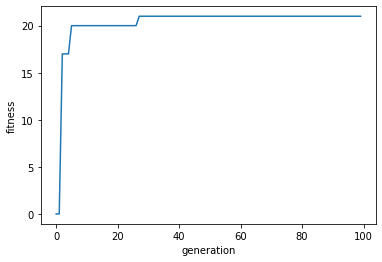

In [2]:
#initializes a new hillclimber and sets the mutation rate
a = hillClimber(10)
#initializes the run function and sets the loops which represents the generations.
b = a.runFunction(100)
#sets the y lable to be fitness
plt.ylabel("fitness")
#sets the x lable to be generations
plt.xlabel("generation")
#plots the graph
plt.plot(b)
#displayes the graph
plt.show()

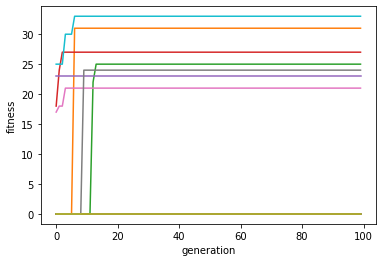

In [3]:
#this will run the hill climber class 10 times for 10 different results
for x in range(10):
    a = hillClimber(10)
    b = a.runFunction(100)
    plt.plot(b)
plt.ylabel("fitness")
plt.xlabel("generation")
plt.show()

In [4]:
#the GeneticAlgorithm class that will be used to solve the knapsack problem.
class GeneticAlgorithm: 
    #initializer of the GeneticAlgorithm class
    def __init__(self, quantity, mutationRate, k, crossoverRate):
        #sets the crossover rate variable to the parameter passed into the GeneticAlgorithm class.
        self.crossoverRate = crossoverRate
        #sets the k variable to the parameter passed into the GeneticAlgorithm class.
        #This variable will be used to set how many neighbours can be taken under consideration from the original individual.
        self.k = k
        #sets the quantity variable to the parameter passed into the GeneticAlgorithm class.
        #sets how many individuals are within the population
        self.quantity = quantity
        #sets the mutation rate variable to the parameter passed into the hillClimber class.
        self.mutationRate = mutationRate
        #sets the capacity to 20, which represents the volume of the backpack in the knapsack problem.
        self.capacity = 20
        #initialises items that can be put inside of the back pack.It sets for each item it's name, benefit and size. 
        self.items = [["a", 5, 3], ["b", 6, 2], ["c", 1, 4], ["d", 9, 5], ["e", 2, 8], ["f", 8, 9], ["g", 4, 10], ["h", 3, 1], ["i", 7, 6], ["j", 10, 7]]
        #intializes a new empty array
        self.population = []
        #this for loop will set up a population based on how big the quantity variable is.
        for i in range(quantity):
            self.population += [[random.randrange(2) for i in range(10)]]
    
    #calculates the total benefit of all the genes within the set
    def fitness(self, genes):
        #intitalises and sets the benefit variable to 0
        benefit = 0
        #initialises and sets the volume variable to 0        
        volume = 0
        #for loop that executes 10 times
        for x in range(10):
            #checks if the gene at position x is within the "backpack"
            if(genes[x] == 1):
                #if yes it adds the benefit and the volume
                benefit += self.items[x][1]
                volume += self.items[x][2]
        #checks if the total volume did not exceed the total capacity of the "backpack"
        if(volume <= self.capacity):
            #if not it returns the total benefit
            return benefit
        else:
            #otherwise it returns zero
            return 0

    #performs the mutation on the specified location within the population array.
    def mutate(self, location):
        #sets the variable to a random number between 0-9.
        i = random.randrange(10)
        #creates a variable that will store temporary genes from the specified location in array list.
        temporaryGenes = self.population[location].copy()
        #checks if the randomly generated number is lower then the mutation rate and if it is perform the code within it.
        if(i < self.mutationRate):
            #checks if the gene at position i is equal to zero and if yes it sets the gene at position i to one
            if(temporaryGenes[i] == 0):
                temporaryGenes[i] = 1
            #and if it is not equal to zero then it sets it to zero
            else:
                temporaryGenes[i] = 0
        #checks if the fitness value of the temporary genes at a specified location is higher then the fitness value of the actual genes at the same location. 
        if(self.fitness(temporaryGenes) > self.fitness(self.population[location])):
            #if yes it sets the actual genes at the specified location to the temporary genes
            self.population[location] = temporaryGenes
    
    #compares two individuals from the population and copies the genes from the winner to the loser
    def survivalOfTheFittest(self):
        #initializes a new variable and sets it to a random number between 0 and the max quantity - 1.
        positionX = random.randrange(self.quantity)
        #initializes a new variable and sets it to a value that has been set before.
        allowedValues = list(range(-self.k, self.k))
        #removes 0 from the variable
        allowedValues.remove(0)
        #sets the y position to a random position within the allowed boundries.
        positionY = positionX + random.choice(allowedValues)
        #makes sure the position is at least the position 0
        if(positionY < 0):
            positionY = 0
        #makes sure that the position is not outside of the upper boundry.
        if(positionY > (self.quantity - 1)):
            positionY = self.quantity - 1
        #checks which indvidual has higher fitness value that is checked using the fitness method.
        if(self.fitness(self.population[positionX]) > self.fitness(self.population[positionY])):
            #if the position x fitness value is higher a for loop will run 10 times.
            for i in range(10):
                #initializes a new variable and sets it to a random value between 1 and 100.
                chance = random.randrange(1, 100)
                #checks if the randomly generated number is lower then the crossover rate
                #this sets the chance of the genes being or not being copied over.
                if(chance < (self.crossoverRate * 100)):
                    #copies over the genes from the population at position x to the population at position y.
                    self.population[positionY][i] = self.population[positionX][i]
            #mutates the genes of the population at position y.
            self.mutate(positionY)
        else:
            #if the position y fitness value is higher a for loop will run 10 times.
            for i in range(10):
                #initializes a new variable and sets it to a random value between 1 and 100.
                chance = random.randrange(1, 100)
                #checks if the randomly generated number is lower then the crossover rate
                #this sets the chance of the genes being or not being copied over.
                if(chance < (self.crossoverRate * 100)):
                    #copies over the genes from the population at position y to the population at position x.
                    self.population[positionX][i] = self.population[positionY][i]
            #mutates the genes of the population at position x.
            self.mutate(positionX)
    
    #manages the running of each mutation.
    def runFunction(self, loops):
        #new variable that will store and array.
        fitnessTrack = []
        #for loop that goes runs the passed in loops amount of times.
        for x in range(loops):
            #runs the survivalOfTheFittest.
            self.survivalOfTheFittest()
            #new variable that is set to 0.
            totalFitness = 0
            #for loop that will go through every individual within population.
            for x in range(self.quantity):
                #the fitness is being added to the totalFitness of the population at the position x.
                totalFitness += self.fitness(self.population[x])
            #total fitness is set to the average of the total fitness.
            totalFitness = totalFitness / self.quantity
            #adds the next fintess value into the aray.
            fitnessTrack.append(totalFitness) 
        #returns the array with the total fitness.
        return fitnessTrack          

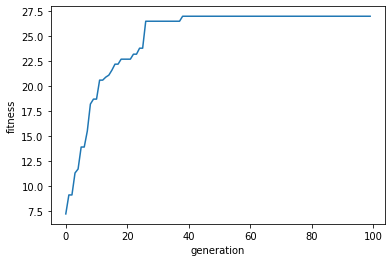

In [5]:
#initializes a new GeneticAlgorithm and sets the quantity, mutation rate, k and crossover rate.
a = GeneticAlgorithm(10, 10, 10, 1)
#initializes the run function and sets the loops which represents the generations.
b = a.runFunction(100)
#sets the y lable to be fitness
plt.ylabel("fitness")
#sets the x lable to be generations
plt.xlabel("generation")
#plots the graph
plt.plot(b)
#displayes the graph
plt.show()

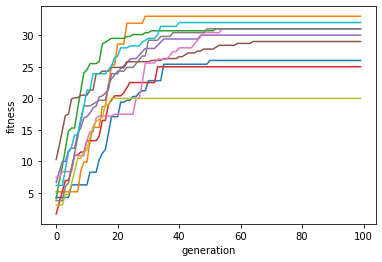

In [6]:
#this will run the genetic algorithm class 10 times for 10 different results.
for x in range(10):
    a = GeneticAlgorithm(10, 10, 10, 1)
    b = a.runFunction(100)
    plt.plot(b)
plt.ylabel("fitness")
plt.xlabel("generation")
plt.show()